train and testing the model

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import cv2
import time as t
from PIL import Image
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import random as rn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
signs = ["fist", "thumb", "V", "Hand"]
data_paths = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\data\ "
test_path = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\test\ " 
num_images = 30
img_size = (100,100)
rounds = 3
# number of pictures = num_images* num of signs * rounds
befor = len(pd.read_csv("paths.csv"))/len(signs) # wie viele fotos pro zeichen es schon im ordner gibt

In [4]:
#get images   uuubberprüfen
def img_gen(path, size):
    img = Image.open(path)
  #  img = img.resize(size, Image.ANTIALIAS) #vorher schon gmeacht
    img = np.array(img) / 255
    return img



def mapping(arr):
    map = lambda t: img_gen(t, img_size)
    res = np.array([map(i) for i in arr])
    return res



Train and test set

In [5]:
data = pd.read_csv("paths.csv")
X = mapping(np.array(data["paths"]))
y = np.array(tf.one_hot(np.array(data["signs"]), len(signs)))
print(np.shape(X))
print(np.shape(y))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(6480, 100, 100, 3)
(6480, 4)


"live" validations set (nicht vom gleichen video)

In [6]:
test = pd.read_csv("test.csv")
val_x = mapping(np.array(test["paths"]))
val_y = np.array(tf.one_hot(np.array(test["signs"]), len(signs)))
print(np.shape(val_x))
print(np.shape(val_y))

(360, 100, 100, 3)
(360, 4)


plot some samples

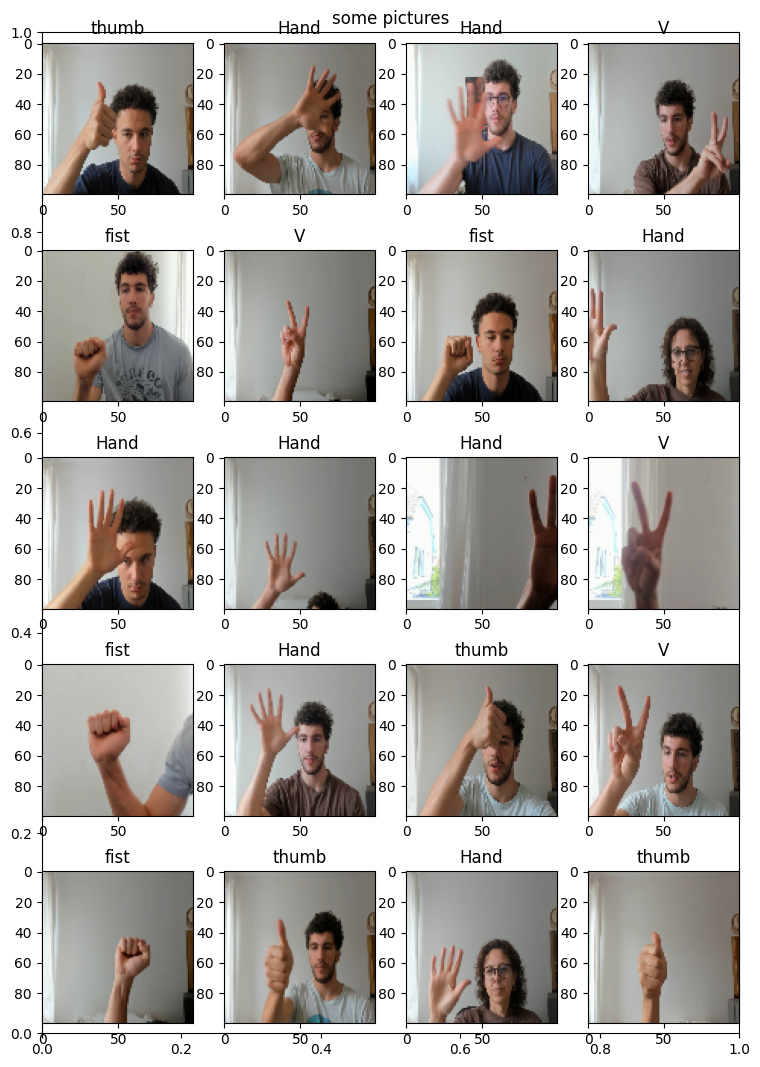

In [7]:
w, h = 10, 10 
fig = plt.figure(figsize=(9, 13))
plt.title("some pictures")
columns, rows = 4, 5




ax = []

for i in range(columns*rows):
    img = x_train[i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(str(signs[np.argmax(y_train[i])]))  
    plt.imshow(img)
 


train the model

In [8]:
s,s = img_size
shape = (s, s, 3)



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(40,kernel_size=(25,25), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"),
    tf.keras.layers.Conv2D(20,kernel_size=(15,15), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"),
    tf.keras.layers.Flatten(input_shape=shape),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(len(signs), activation='softmax')
    ])




model.compile(loss="BinaryCrossentropy", optimizer='adam', metrics=['accuracy'])



history = model.fit(x=x_train, y=y_train,
                    epochs=80,
                    batch_size=300,
                    validation_data=(val_x, val_y)
                    )



Epoch 1/80
18/18 [==============================] - 17s 383ms/step - loss: 0.6518 - accuracy: 0.2560 - val_loss: 0.5782 - val_accuracy: 0.2500
Epoch 2/80
18/18 [==============================] - 5s 291ms/step - loss: 0.5888 - accuracy: 0.2458 - val_loss: 0.5655 - val_accuracy: 0.2639
Epoch 3/80
18/18 [==============================] - 5s 294ms/step - loss: 0.5779 - accuracy: 0.2612 - val_loss: 0.5665 - val_accuracy: 0.2500
Epoch 4/80
18/18 [==============================] - 5s 294ms/step - loss: 0.5754 - accuracy: 0.2556 - val_loss: 0.5654 - val_accuracy: 0.2472
Epoch 5/80
18/18 [==============================] - 5s 294ms/step - loss: 0.5742 - accuracy: 0.2442 - val_loss: 0.5651 - val_accuracy: 0.2500
Epoch 6/80
18/18 [==============================] - 5s 293ms/step - loss: 0.5714 - accuracy: 0.2558 - val_loss: 0.5627 - val_accuracy: 0.2778
Epoch 7/80
18/18 [==============================] - 5s 293ms/step - loss: 0.5711 - accuracy: 0.2490 - val_loss: 0.5662 - val_accuracy: 0.2278
Epoch

In [9]:
#on test data from trainingsset
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

41/41 [==============================] - 1s 10ms/step - loss: 0.2873 - accuracy: 0.8302
Accuracy: 0.83


In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 40)      75040     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 20)        180020    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 20)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12500)             0         
                                                                 
 dense (Dense)               (None, 60)                7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


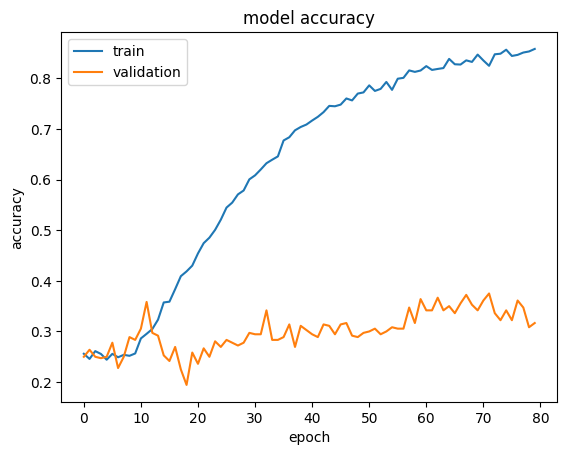

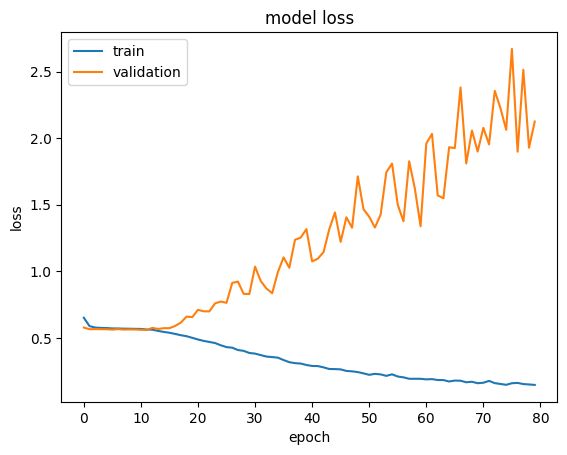

In [11]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
vc = cv2.VideoCapture(0)

mache ein zeichen 


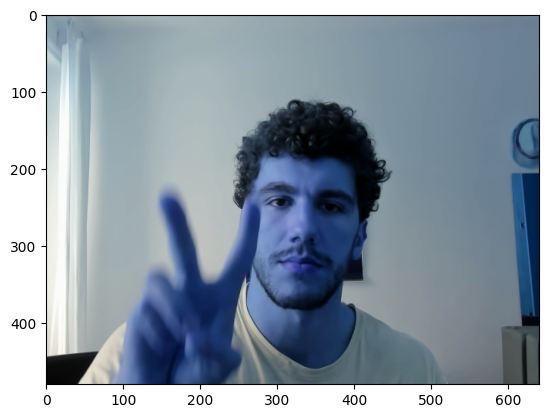

1/1 [==============================] - 0s 120ms/step
Probability fist = 0.0%
Probability thumb = 100.0%
Probability V = 0.0%
Probability Hand = 0.0%
None


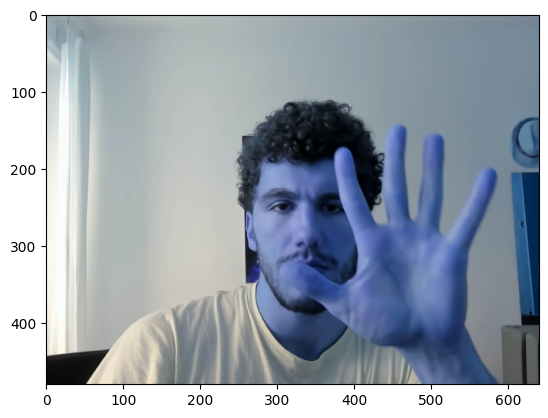

1/1 [==============================] - 0s 13ms/step
Probability fist = 0.0%
Probability thumb = 100.0%
Probability V = 0.0%
Probability Hand = 0.0%
None


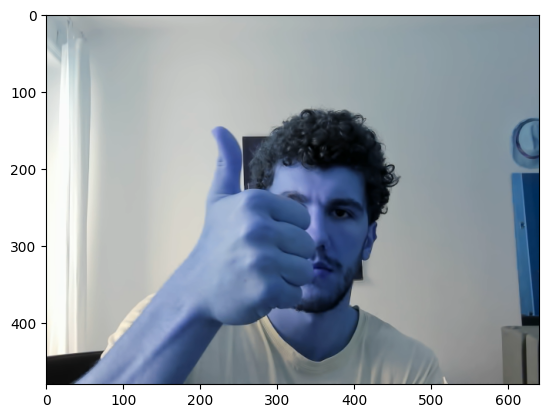

1/1 [==============================] - 0s 26ms/step
Probability fist = 0.0%
Probability thumb = 100.0%
Probability V = 0.0%
Probability Hand = 0.0%
None


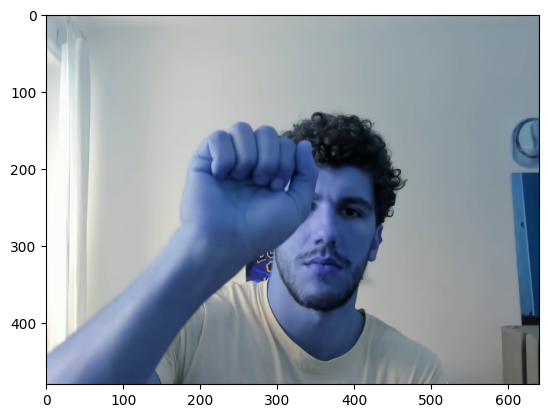

1/1 [==============================] - 0s 14ms/step
Probability fist = 0.0%
Probability thumb = 0.0%
Probability V = 100.0%
Probability Hand = 0.0%
None


In [13]:
print("mache ein zeichen ")

def prob(t):
    for i in range(len(signs)):
        pred = t/np.sum(t)*100
        print("Probability "+ str(signs[i])+ " = " + str(round(float(pred[i]),3))+ "%")
        
for i in range(4):
    input("sdhfgsdl")
    x, frame = vc.read()
    #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.show()
    frame = cv2.resize(frame, img_size)

    frame.resize(1,100,100,3)
    test = model.predict(frame)


    print(prob(sum(test)))

confusions matrix

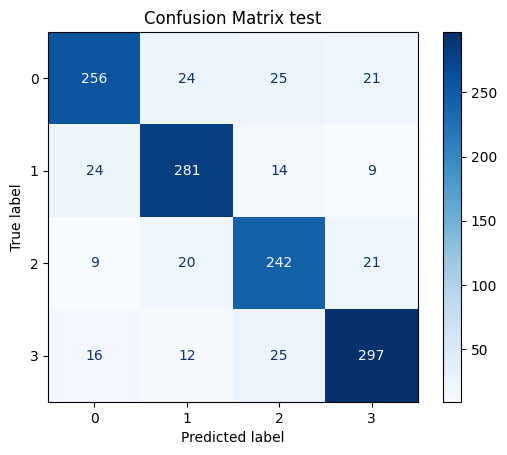

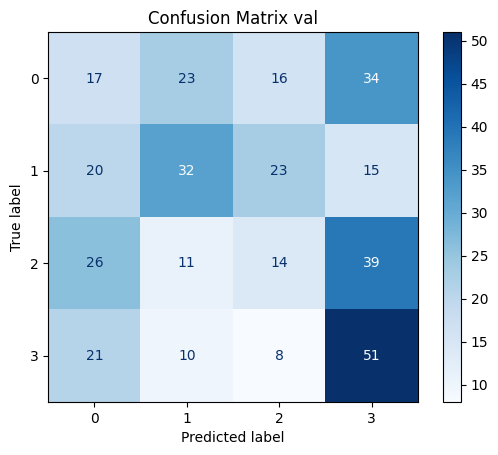

['fist', 'thumb', 'V', 'Hand']


In [14]:
y_true = [np.argmax(i) for i in y_test]	
y_pred = [np.argmax(i) for i in model(x_test)]

y_true_val = [np.argmax(i) for i in val_y]
y_pred_val = [np.argmax(i) for i in model(val_x)]


cm = confusion_matrix(y_true, y_pred)
cm2 = confusion_matrix(y_true_val, y_pred_val)

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix test")
plt.show()

disp2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix val")
plt.show()
print(signs)